In [1]:
import os
os.chdir("../")

### Model

In [2]:
from rag_pipeline.components.models import ModelConfig

In [3]:
model = ModelConfig()

In [4]:
model.get_agent_model(
    agent_name = "question_rewriter"
).get("name")

'gpt-4o-mini'

### Prompts

In [5]:
from rag_pipeline.components.prompts import render_prompt

In [7]:
render_prompt(
    prompt_name = "question_rewriter",
    current_question = "What is RAG?",
    conversation = "User: What is AI?\nAgent: AI stands for Artificial Intelligence"
)

{'system': 'ROLE\n- You are a question rewriter for a Retrieval-Augmented Generation system.\n\nINPUTS\n- "current_question": The user\'s most recent query.\n- "conversation": A short history of recent interactions (if available).\n\nTASK\n- Rephrase the query into a clear, standalone form that captures the full intent of the user\'s question.\n\nRULES\n- Use conversation only to clarify vague references like "this file" or "the previous report".\n- Keep the question concise and factual (under 40 tokens).\n- Do not guess missing details; preserve ambiguity if uncertain.\n- Avoid multi-sentence questions.',
 'user': 'USER QUERY: What is RAG?\nCHAT HISTORY: User: What is AI?\nAgent: AI stands for Artificial Intelligence',
 'output_schema': '{\n  "rephrased_question": "string"\n}\n'}

### Graph

In [2]:
from graph import run_graph

In [3]:
graph = run_graph()

In [4]:
user_input = "What is RAG?"
input_data = {
    "question": user_input
}

In [5]:
await graph.ainvoke(
    input = input_data,
    config = {
        "configurable": {
            "retriever": None
        }
    }
)

{'question': 'What is RAG?',
 'rephrased_question': 'What does RAG stand for and what does it mean?'}

### Data Extract

In [2]:
from rag_pipeline.utils.extract_doc import extract_from_pdf, extract_from_text_files

In [3]:
pdf_texts, pfd_tables, pdf_metadata = extract_from_pdf()
txt_texts, txt_metadata = extract_from_text_files()

📄 Reading Assignment.pdf ...
📄 Reading Networking Activity.pdf ...
✅ Extracted 4 pages and 0 tables from PDFs.
📄 RAG.txt: 2 chunks
✅ Extracted 2 text chunks from 'data'.


In [4]:
pdf_texts

[{'content': 'LLM Specialist Assignment\nOverview\nCreate a Retrieval-Augmented Generation (RAG) pipeline that allows users to upload documents and\nask questions based on their content. The system should leverage vector databases for efficient retrieval\nand an LLM API (e.g., OpenAI, Gemini, or another REST-based model) for generating responses. The entire\napplication should be containerized using Docker and deployable on cloud or local environments.\nRequirements:\n1. Document Ingestion & Processing:\no Support uploading up to 20 documents, each with a maximum of 1000 pages.\no Chunk documents into manageable sizes for efficient retrieval.\no Use text embeddings to store document chunks in a vector database (e.g., FAISS, Pinecone,\nWeaviate, or ChromaDB).\n2. Retrieval-Augmented Generation (RAG) Pipeline:\no Accept user queries and retrieve relevant document chunks.\no Pass the retrieved chunks to the LLM API for contextual response generation.\no Ensure responses are accurate, conc

In [6]:
pdf_metadata

[{'file_name': 'Assignment.pdf',
  'file_path': 'C:\\Users\\rahul\\Desktop\\Coding Assignment\\Retrieval-Augmented-Generation\\data\\Assignment.pdf',
  'type': 'pdf',
  'size_kb': 84.35,
  'total_pages': 2,
  'total_tables': 0},
 {'file_name': 'Networking Activity.pdf',
  'file_path': 'C:\\Users\\rahul\\Desktop\\Coding Assignment\\Retrieval-Augmented-Generation\\data\\Networking Activity.pdf',
  'type': 'pdf',
  'size_kb': 215.3,
  'total_pages': 2,
  'total_tables': 0}]

In [7]:
txt_metadata

[{'file_name': 'RAG.txt',
  'file_path': 'C:\\Users\\rahul\\Desktop\\Coding Assignment\\Retrieval-Augmented-Generation\\data\\RAG.txt',
  'type': 'text',
  'size_kb': 0.66,
  'total_chunks': 2}]

In [6]:
pdf_texts.extend(txt_texts)

In [7]:
pdf_texts

[{'content': 'LLM Specialist Assignment\nOverview\nCreate a Retrieval-Augmented Generation (RAG) pipeline that allows users to upload documents and\nask questions based on their content. The system should leverage vector databases for efficient retrieval\nand an LLM API (e.g., OpenAI, Gemini, or another REST-based model) for generating responses. The entire\napplication should be containerized using Docker and deployable on cloud or local environments.\nRequirements:\n1. Document Ingestion & Processing:\no Support uploading up to 20 documents, each with a maximum of 1000 pages.\no Chunk documents into manageable sizes for efficient retrieval.\no Use text embeddings to store document chunks in a vector database (e.g., FAISS, Pinecone,\nWeaviate, or ChromaDB).\n2. Retrieval-Augmented Generation (RAG) Pipeline:\no Accept user queries and retrieve relevant document chunks.\no Pass the retrieved chunks to the LLM API for contextual response generation.\no Ensure responses are accurate, conc

### Data Extract Pipeline

In [2]:
from rag_pipeline.pipeline.data_extract import extract_data_pipeline
from rag_pipeline.components.upload import upload_file_metadata

In [3]:
texts, tables, metadata = extract_data_pipeline()

📄 Reading Assignment.pdf ...
📄 Reading Networking Activity.pdf ...
✅ Extracted 4 pages and 0 tables from PDFs.
📄 RAG.txt: 2 chunks
✅ Extracted 2 text chunks from 'data'.
✅ Combined 6 text chunks from 3 files.


In [4]:
metadata

[{'file_name': 'Assignment.pdf',
  'file_path': 'C:\\Users\\rahul\\Desktop\\Coding Assignment\\Retrieval-Augmented-Generation\\data\\Assignment.pdf',
  'type': 'pdf',
  'size_kb': 84.35,
  'total_pages': 2,
  'total_tables': 0},
 {'file_name': 'Networking Activity.pdf',
  'file_path': 'C:\\Users\\rahul\\Desktop\\Coding Assignment\\Retrieval-Augmented-Generation\\data\\Networking Activity.pdf',
  'type': 'pdf',
  'size_kb': 215.3,
  'total_pages': 2,
  'total_tables': 0},
 {'file_name': 'RAG.txt',
  'file_path': 'C:\\Users\\rahul\\Desktop\\Coding Assignment\\Retrieval-Augmented-Generation\\data\\RAG.txt',
  'type': 'text',
  'size_kb': 0.66,
  'total_chunks': 2}]

In [6]:
await upload_file_metadata(
    session_id = "test_1",
    file_metadata = metadata
)

✅ Metadata uploaded successfully for session_id: test_1
🔒 MongoDB connection closed.


{'session_id': 'test_1',
 'uploaded_files': [{'file_name': 'Assignment.pdf',
   'file_path': 'C:\\Users\\rahul\\Desktop\\Coding Assignment\\Retrieval-Augmented-Generation\\data\\Assignment.pdf',
   'type': 'pdf',
   'size_kb': 84.35,
   'total_pages': 2,
   'total_tables': 0},
  {'file_name': 'Networking Activity.pdf',
   'file_path': 'C:\\Users\\rahul\\Desktop\\Coding Assignment\\Retrieval-Augmented-Generation\\data\\Networking Activity.pdf',
   'type': 'pdf',
   'size_kb': 215.3,
   'total_pages': 2,
   'total_tables': 0},
  {'file_name': 'RAG.txt',
   'file_path': 'C:\\Users\\rahul\\Desktop\\Coding Assignment\\Retrieval-Augmented-Generation\\data\\RAG.txt',
   'type': 'text',
   'size_kb': 0.66,
   'total_chunks': 2}],
 'uploaded_at': datetime.datetime(2025, 10, 7, 8, 4, 43, 594747)}

### retriever

In [4]:
from rag_pipeline.components.retriever import create_retriever

In [5]:
retriever, path = create_retriever(
    texts = texts,
    tables = tables,
    model_name = "text-embedding-3-small",
    save_path = "./models/faiss_index"
)

📚 Preparing 6 documents for indexing...
✅ Retriever (FAISS index) created and saved at: ./models/faiss_index


In [6]:
from graph import run_graph
graph = run_graph()

In [7]:
user_input = "What is RAG?"
input_data = {
    "question": user_input
}

In [8]:
await graph.ainvoke(
    input = input_data,
    config = {
        "configurable": {
            "retriever": retriever
        }
    }
)

{'question': 'What is RAG?',
 'rephrased_question': 'What does RAG stand for and what does it refer to?',
 'documents': [Document(id='5112de56-8988-40e2-b1aa-89d4a2b9bbb5', metadata={'source': 'RAG.txt', 'type': 'text', 'chunk_id': 1}, page_content='Retrieval-Augmented Generation (RAG) combines retrieval and generation to improve the factual accuracy of language models. It works by fetching relevant information from external sources such as documents or databases, then using that information to generate more accurate and context-aware responses.'),
  Document(id='2de9369f-dc97-4a48-9541-b0998ccc2a73', metadata={'source': 'Assignment.pdf', 'type': 'pdf', 'page_number': 1}, page_content='LLM Specialist Assignment\nOverview\nCreate a Retrieval-Augmented Generation (RAG) pipeline that allows users to upload documents and\nask questions based on their content. The system should leverage vector databases for efficient retrieval\nand an LLM API (e.g., OpenAI, Gemini, or another REST-based mod

### Graph

In [2]:
from graph import run_graph
graph = run_graph()

In [3]:
from IPython.display import display, Image
from langchain_core.runnables.graph import MermaidDrawMethod

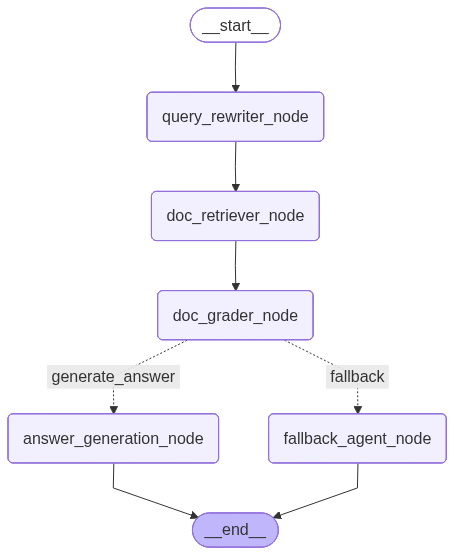

In [4]:
display(
    Image(
        graph.get_graph().draw_mermaid_png(
            draw_method = MermaidDrawMethod.API
        )
    )
)

### Convo update

In [5]:
def update_recent_chats(
        recent_chats: dict[int, dict[str, str]],
        latest_question: str,
        latest_answer: str,
        max_chats: int = 3
) -> dict[int, dict[str, str]]:
    """
    Updates the conversation history to always contain the last `max_chats` turns.
    Automatically shifts and reindexes so keys remain sequential (1..max_chats).
    """
    # Ensure dictionary is valid
    if not isinstance(recent_chats, dict):
        recent_chats = {}

    # Append the new chat at the end
    chats = list(recent_chats.values())
    chats.append({
        "question": latest_question.strip(),
        "answer": latest_answer.strip()
    })

    # Keep only the last N
    chats = chats[-max_chats:]

    # Rebuild with proper numeric keys (1..max_chats)
    recent_chats = {i + 1: chat for i, chat in enumerate(chats)}

    return recent_chats

In [6]:
recent_chats = {
    1: {"question": "What is RAG?", "answer": "It combines retrieval and generation."},
    2: {"question": "What is FAISS?", "answer": "A vector database used for similarity search."},
    3: {"question": "Explain embeddings.", "answer": "Embeddings represent text as numerical vectors."}
}

In [7]:
# Add a new chat
recent_chats = update_recent_chats(
    recent_chats,
    latest_question = "How does LangGraph help?",
    latest_answer = "LangGraph manages multi-agent workflows through state graphs."
)

In [8]:
print(recent_chats)


{1: {'question': 'What is FAISS?', 'answer': 'A vector database used for similarity search.'}, 2: {'question': 'Explain embeddings.', 'answer': 'Embeddings represent text as numerical vectors.'}, 3: {'question': 'How does LangGraph help?', 'answer': 'LangGraph manages multi-agent workflows through state graphs.'}}


### Final Graph

In [2]:
from graph import run_graph

In [3]:
graph = run_graph()

In [4]:
from rag_pipeline.pipeline.data_extract import extract_data_pipeline

In [5]:
texts, tables, metadata = extract_data_pipeline()

📄 Reading Assignment.pdf ...
📄 Reading Networking Activity.pdf ...
✅ Extracted 4 pages and 0 tables from PDFs.
📄 RAG.txt: 2 chunks
✅ Extracted 2 text chunks from 'data'.
✅ Combined 6 text chunks from 3 files.


In [6]:
from rag_pipeline.components.retriever import create_retriever

In [7]:
retriever, path = create_retriever(
    texts = texts,
    tables = tables,
    model_name = "text-embedding-3-small",
    save_path = "./models/faiss_index"
)

📚 Preparing 6 documents for indexing...
✅ Retriever (FAISS index) created and saved at: ./models/faiss_index


In [9]:
user_input = "What is RAG?"
input_data = {
    "question": user_input
}

In [10]:
result = await graph.ainvoke(
    input = input_data,
    config = {
        "configurable": {
            "retriever": retriever,
            "thread_id": 1
        }
    }
)

In [11]:
result["messages"]

{1: {'question': 'What does RAG stand for or refer to?',
  'answer': 'RAG = Retrieval-Augmented Generation. It combines retrieval and generation to improve factual accuracy by fetching relevant information from external sources (documents/databases) and using it as context for response generation. Typical components: document ingestion and chunking, embeddings stored in a vector DB (FAISS, Pinecone, Weaviate, ChromaDB), retrieval of relevant chunks, and passing those chunks to an LLM API (OpenAI, Gemini, etc.) for generation.'}}

In [12]:
result["generated_answer"]

'RAG stands for Retrieval-Augmented Generation. It’s an approach that combines retrieval and generative language modeling to improve factual accuracy: the system fetches relevant information from external sources (for example, documents or databases) and uses that retrieved content as context when generating responses, producing more accurate and context-aware output. A typical RAG pipeline (as in the provided assignment) includes document ingestion and chunking, creating text embeddings and storing them in a vector database (e.g., FAISS, Pinecone, Weaviate, ChromaDB), retrieving relevant chunks for a user query, and passing those chunks to an LLM API (e.g., OpenAI, Gemini) to generate the final answer. RAG systems are typically exposed via REST APIs and can be containerized for deployment.'

In [14]:
user_input_2 = "how it is compared to llm?"
input_data_2 = {
    "question": user_input_2
}

In [15]:
result = await graph.ainvoke(
    input = input_data_2,
    config = {
        "configurable": {
            "retriever": retriever,
            "thread_id": 1
        }
    }
)

In [16]:
result["messages"]

{1: {'question': 'What does RAG stand for or refer to?',
  'answer': 'RAG = Retrieval-Augmented Generation. It combines retrieval and generation to improve factual accuracy by fetching relevant information from external sources (documents/databases) and using it as context for response generation. Typical components: document ingestion and chunking, embeddings stored in a vector DB (FAISS, Pinecone, Weaviate, ChromaDB), retrieval of relevant chunks, and passing those chunks to an LLM API (OpenAI, Gemini, etc.) for generation.'},
 2: {'question': 'How does Retrieval-Augmented Generation (RAG) compare to large language models (LLMs)?',
  'answer': 'RAG augments LLMs by fetching relevant external information and feeding it to a generator (usually an LLM). Typical components: retriever, generator, and a vector DB (e.g., FAISS). RAG improves factual accuracy, makes responses more context-aware, and reduces hallucinations compared with using an LLM alone.'}}

In [17]:
result["generated_answer"]

'Retrieval‑Augmented Generation (RAG) augments a language model by combining retrieval and generation to improve factual accuracy and context awareness. Instead of relying solely on the model’s internal knowledge, RAG fetches relevant information from external sources (documents or databases) and supplies those retrieved chunks to a generator (usually an LLM) to produce answers. A typical RAG system therefore has three parts: a retriever that searches and fetches relevant chunks, a generator (the LLM) that uses the retrieved data to form a response, and a vector database (e.g., FAISS) that stores embeddings for fast semantic search. Compared with using an LLM alone, RAG reduces hallucinations and enhances the reliability and factual accuracy of LLM-based systems by grounding generation in retrieved external content.'